In [ ]:
# Time Series Assignment

In [165]:
# Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
!pip install statsmodels


In [ ]:
data = pd.read_csv('/Users/don/Downloads/DailyDelhiClimateTrain.csv')
data2 =  pd.read_csv('/Users/don/Downloads/DailyDelhiClimateTest.csv')

#data = pd.read_csv('/Users/don/Downloads/DailyDelhiClimateTrain.csv', index_col='date', parse_dates=True)

In [223]:
#testing set
data2.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333

In [167]:
data.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

In [169]:
data.tail()

date   meantemp    humidity  wind_speed  meanpressure
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

In [175]:
#data.drop(pd.Timestamp('2017-01-01'), inplace=True)

# Drop the last index
data.drop(data.index[-1], inplace=True)

data.tail()

date   meantemp   humidity  wind_speed  meanpressure
1456  2016-12-27  16.850000  67.550000    8.335000   1017.200000
1457  2016-12-28  17.217391  68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095  87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238  89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632  87.000000    7.325000   1016.100000

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1461 non-null   object 
 1   meantemp      1461 non-null   float64
 2   humidity      1461 non-null   float64
 3   wind_speed    1461 non-null   float64
 4   meanpressure  1461 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [177]:
data.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [178]:
data.describe()

meantemp     humidity   wind_speed  meanpressure
count  1461.000000  1461.000000  1461.000000   1461.000000
mean     25.506127    60.744851     6.806865   1011.101197
std       7.339416    16.743928     4.559688    180.293335
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.571429
50%      27.714286    62.625000     6.250000   1008.555556
75%      31.312500    72.125000     9.250000   1014.937500
max      38.714286    98.000000    42.220000   7679.333333

In [179]:
data.index

RangeIndex(start=0, stop=1461, step=1)

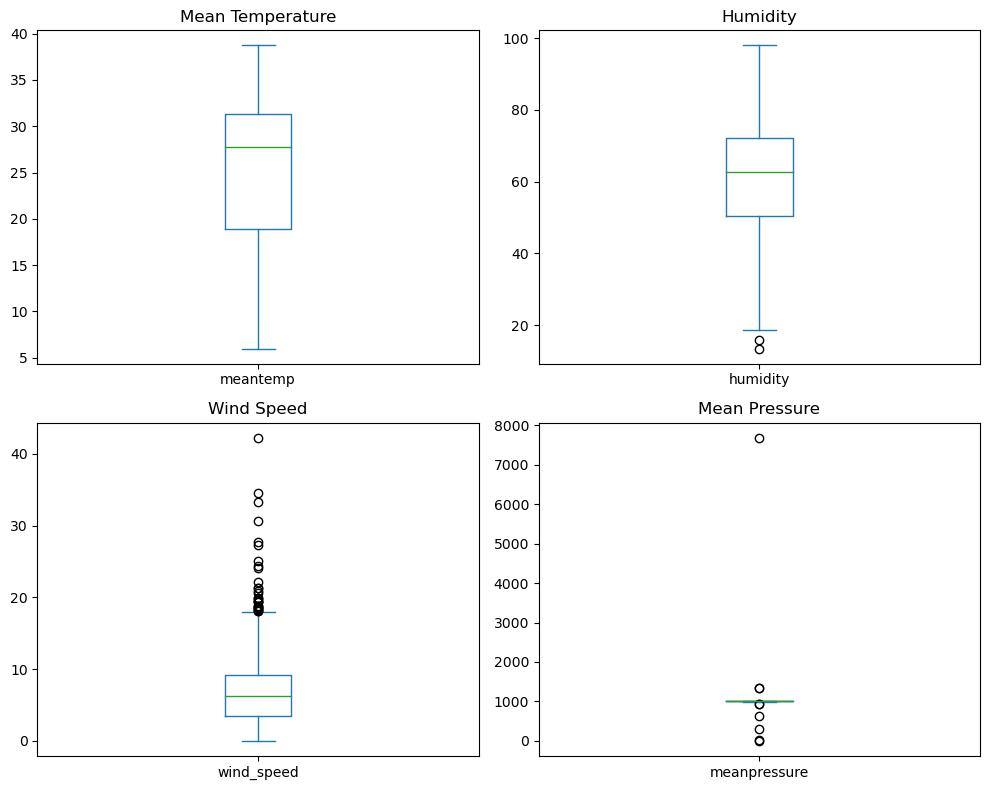

In [180]:
plt.figure(figsize=(10, 8))

# Boxplot for 'meantemp'
plt.subplot(2, 2, 1)
data['meantemp'].plot(kind='box')
plt.title('Mean Temperature')

# Boxplot for 'humidity'
plt.subplot(2, 2, 2)
data['humidity'].plot(kind='box')
plt.title('Humidity')

# Boxplot for 'wind_speed'
plt.subplot(2, 2, 3)
data['wind_speed'].plot(kind='box')
plt.title('Wind Speed')

# Boxplot for 'meanpressure'
plt.subplot(2, 2, 4)
data['meanpressure'].plot(kind='box')
plt.title('Mean Pressure')

# Display the plots
plt.tight_layout()
plt.show()

/var/folders/87/282ht65d4m13tkmwtmpv92mw0000gn/T/ipykernel_47581/3113454433.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


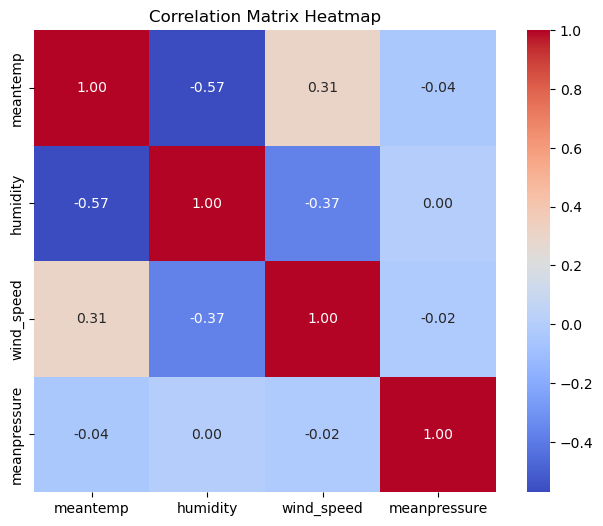

In [181]:
# Correlation Analysis
# Calculate the correlation matrix
corr = data.corr()

# Heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [182]:
corr

meantemp  humidity  wind_speed  meanpressure
meantemp      1.000000 -0.570510    0.305011     -0.038838
humidity     -0.570510  1.000000   -0.372565      0.001693
wind_speed    0.305011 -0.372565    1.000000     -0.020658
meanpressure -0.038838  0.001693   -0.020658      1.000000

In [183]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])
print(data.dtypes)
print(data.head())

date            datetime64[ns]
meantemp               float64
humidity               float64
wind_speed             float64
meanpressure           float64
dtype: object
        date   meantemp   humidity  wind_speed  meanpressure
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000


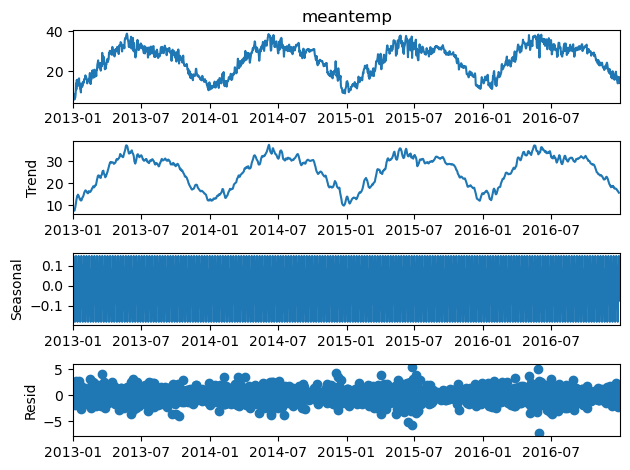

In [184]:
data.set_index('date', inplace=True) # Selected time series to decompose

ts = data['meantemp']
# Decompose the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(ts, model='additive') # Choose 'model' as 'additive' or 'multiplicative'

# Plot the decomposed components
fig = decomposition.plot()
plt.show()

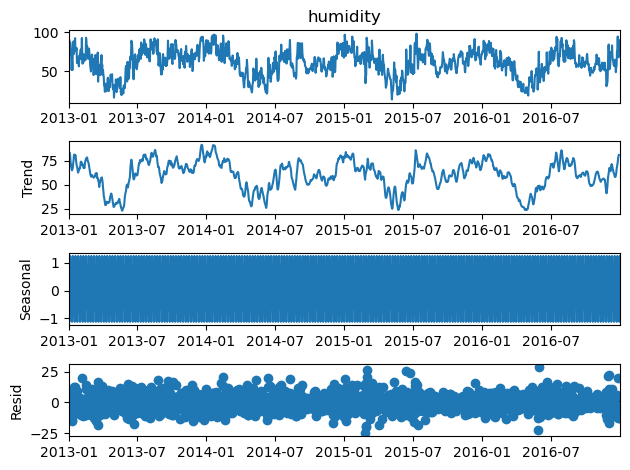

In [185]:
# Humudity time series to decompose
ts = data['humidity']
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')

# Plot the decomposed components
fig = decomposition.plot()
plt.show()

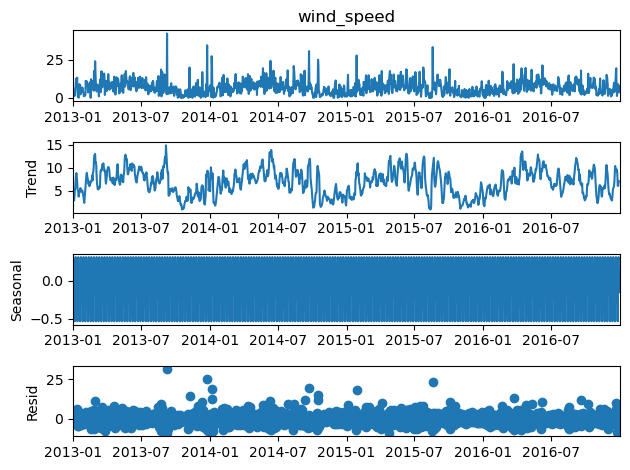

In [186]:
# decomposing wind_speed time-series
ts = data['wind_speed']

# Decompose the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(ts, model='additive') 

# Plot the decomposed components
fig = decomposition.plot()
plt.show()

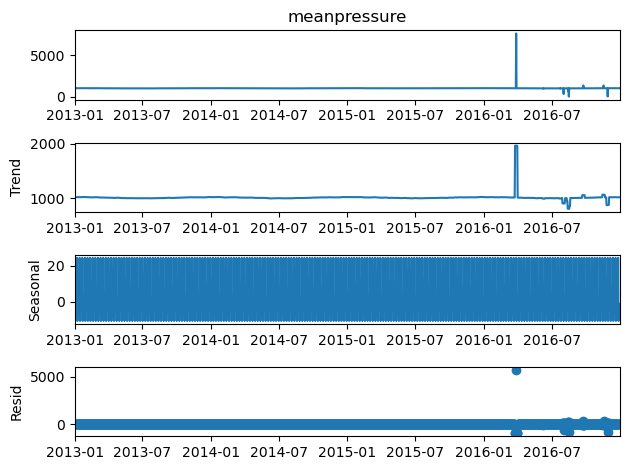

In [187]:
# decomposing meanpressure time-series
ts = data['meanpressure']

# Decompose the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(ts, model='additive') 

# Plot the decomposed components
fig = decomposition.plot()
plt.show()

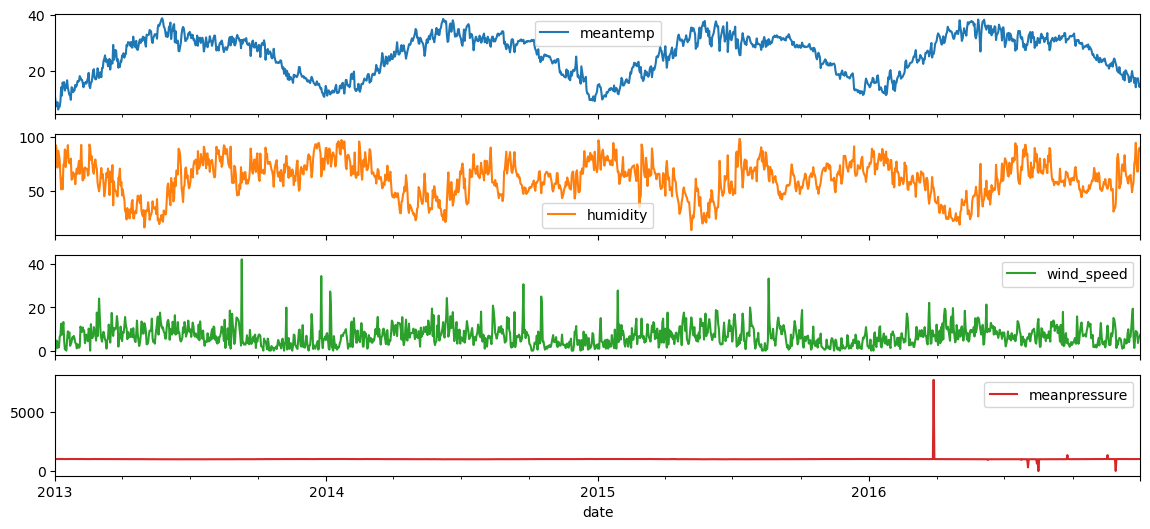

In [188]:
data.plot(subplots=True, figsize=(14,6))
plt.show()

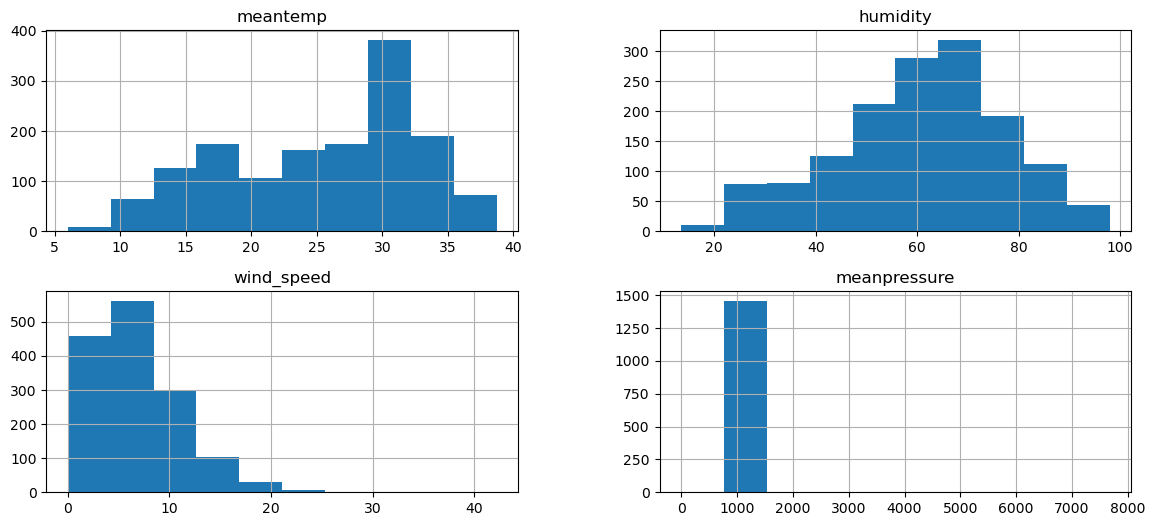

In [189]:
data.hist(figsize=(14,6))
plt.show()

In [190]:
df_monthly = data['meantemp'].resample('MS').mean()
df_monthly.head()

date
2013-01-01    12.074770
2013-02-01    16.867560
2013-03-01    22.814209
2013-04-01    28.895119
2013-05-01    33.776767
Freq: MS, Name: meantemp, dtype: float64

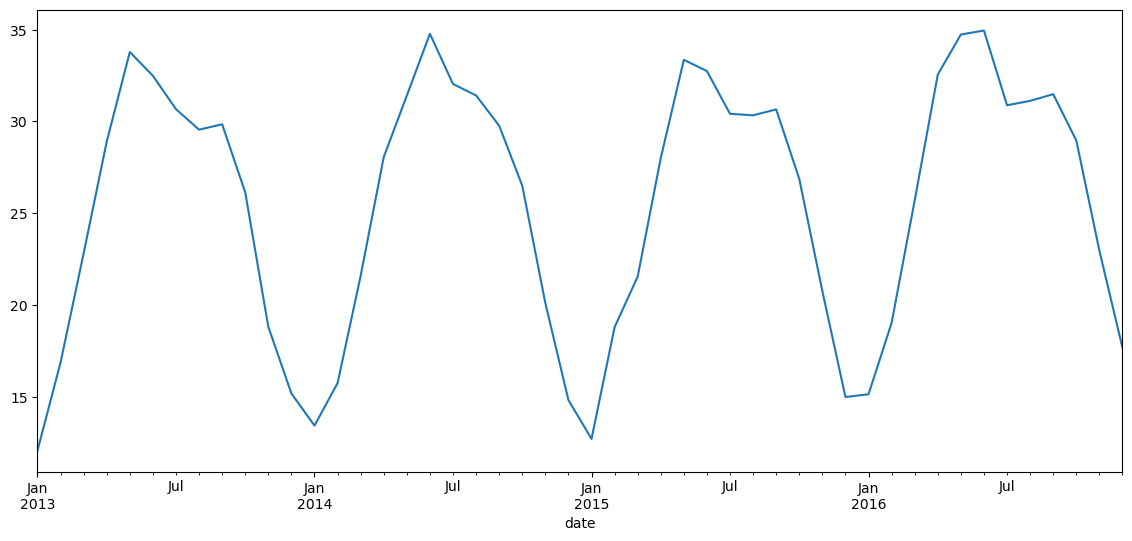

In [191]:
df_monthly.plot(figsize=(14,6))
plt.show()

In [192]:
# data = data.asfreq('D')
# data.index

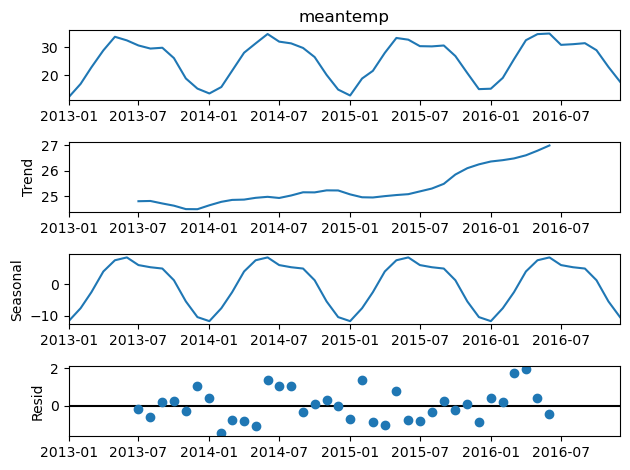

In [193]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df_monthly, period = 12)
decomp.plot()
plt.show()

In [194]:
#Part 2
data.dtypes

meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [195]:
# 'date' is the index, we access it via data.index
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day

# Show the results
print(data.head())


             meantemp   humidity  wind_speed  meanpressure  Year  Month  Day
date                                                                        
2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1    1
2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1    2
2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1    3
2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1    4
2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1    5


In [196]:
# 'meantemp' is the target variable we are interested in
data['Lag_SameDayLastWeek'] = data['meantemp'].shift(7)
data['Lag_SameDayLastMonth'] = data['meantemp'].shift(30)  # Approximation
data['Lag_SameDayLastYear'] = data['meantemp'].shift(365)

# Show results
(data[['meantemp', 'Lag_SameDayLastWeek', 'Lag_SameDayLastMonth', 'Lag_SameDayLastYear']].head(370))

meantemp  Lag_SameDayLastWeek  Lag_SameDayLastMonth  \
date                                                               
2013-01-01  10.000000                  NaN                   NaN   
2013-01-02   7.400000                  NaN                   NaN   
2013-01-03   7.166667                  NaN                   NaN   
2013-01-04   8.666667                  NaN                   NaN   
2013-01-05   6.000000                  NaN                   NaN   
...               ...                  ...                   ...   
2014-01-01  13.375000            13.666667             17.250000   
2014-01-02  11.000000            12.125000             17.500000   
2014-01-03  12.500000            11.875000             17.142857   
2014-01-04  12.875000            10.875000             17.142857   
2014-01-05  12.375000            10.571429             16.125000   

            Lag_SameDayLastYear  
date                             
2013-01-01                  NaN  
2013-01-02                  NaN  
2013-01-03                  NaN  
2013-01-04                  NaN  
2013-01-05                  NaN  
...                         ...  
2014-01-01            10.000000  
2014-01-02             7.400000  
2014-01-03             7.166667  
2014-01-04             8.666667  
2014-01-05             6.000000  

[370 rows x 4 columns]

In [197]:
# 'meantemp' is the target variable for which we calculate the rolling average
data['2M_RollingAvg_meantemp'] = data['meantemp'].rolling(window=60).mean()

# Display the results with the new column
print(data[['meantemp', '2M_RollingAvg_meantemp']].head(65))


             meantemp  2M_RollingAvg_meantemp
date                                         
2013-01-01  10.000000                     NaN
2013-01-02   7.400000                     NaN
2013-01-03   7.166667                     NaN
2013-01-04   8.666667                     NaN
2013-01-05   6.000000                     NaN
...               ...                     ...
2013-03-02  19.000000               14.549048
2013-03-03  19.333333               14.747937
2013-03-04  17.600000               14.921825
2013-03-05  20.875000               15.125298
2013-03-06  20.857143               15.372917

[65 rows x 2 columns]


In [198]:
# 'meantemp' is the column of interest
data['MaxTempToDate'] = data['meantemp'].expanding().max()

# Display the results
print(data[['meantemp', 'MaxTempToDate']].head(15))  # Adjust the number of rows to display as needed


             meantemp  MaxTempToDate
date                                
2013-01-01  10.000000      10.000000
2013-01-02   7.400000      10.000000
2013-01-03   7.166667      10.000000
2013-01-04   8.666667      10.000000
2013-01-05   6.000000      10.000000
2013-01-06   7.000000      10.000000
2013-01-07   7.000000      10.000000
2013-01-08   8.857143      10.000000
2013-01-09  14.000000      14.000000
2013-01-10  11.000000      14.000000
2013-01-11  15.714286      15.714286
2013-01-12  14.000000      15.714286
2013-01-13  15.833333      15.833333
2013-01-14  12.833333      15.833333
2013-01-15  14.714286      15.833333


In [199]:
# Resample to get quarterly means
quarterly_mean = data['meantemp'].resample('Q').mean()

# Display the quarterly means:
print(quarterly_mean.head())


date
2013-03-31    17.265000
2013-06-30    31.740215
2013-09-30    30.019242
2013-12-31    20.053429
2014-03-31    16.963228
Freq: Q-DEC, Name: meantemp, dtype: float64


In [200]:
# Resample to get yearly means
yearly_mean = data['meantemp'].resample('A').mean()

# Display the yearly means
print(yearly_mean.head())


date
2013-12-31    24.791494
2014-12-31    25.010673
2015-12-31    25.114591
2016-12-31    27.103373
Freq: A-DEC, Name: meantemp, dtype: float64


In [201]:
#Part 3

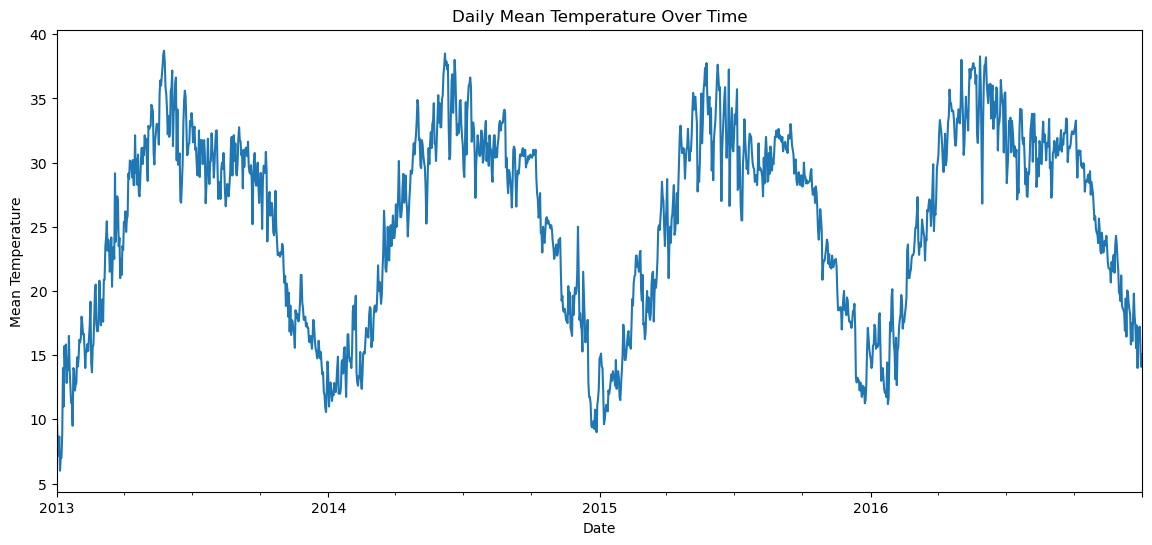

In [202]:
# Plot the time series of 'meantemp'
data['meantemp'].plot(figsize=(14, 6), title='Daily Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.show()


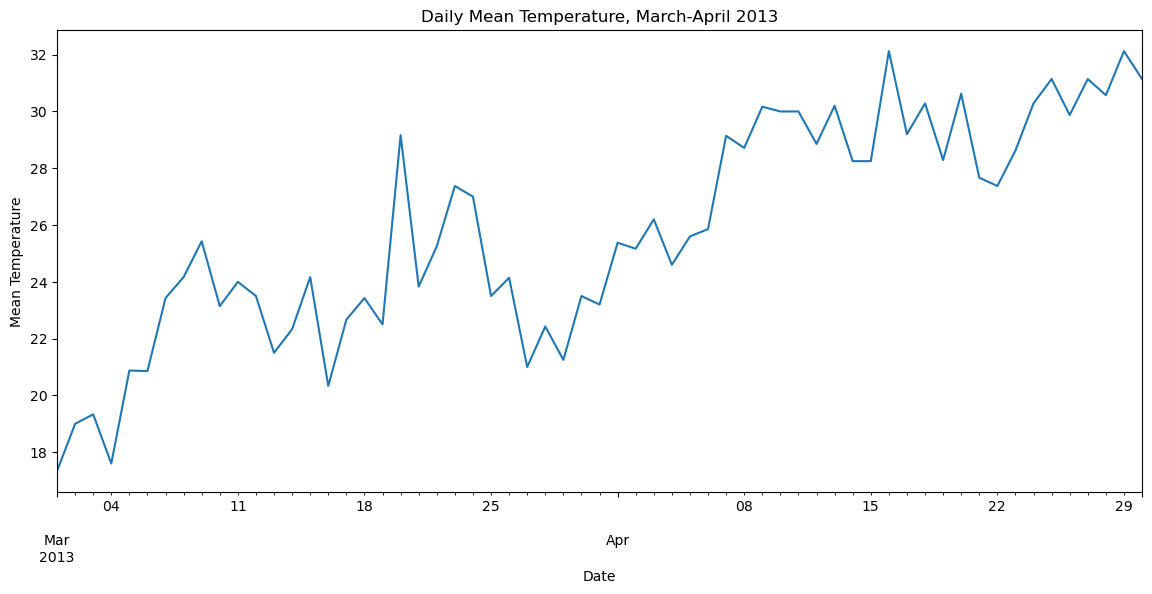

In [203]:
# Zoom into March and April 2013
data['meantemp']['2013-03':'2013-04'].plot(figsize=(14, 6), title='Daily Mean Temperature, March-April 2013')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.show()


/var/folders/87/282ht65d4m13tkmwtmpv92mw0000gn/T/ipykernel_47581/2699758358.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  days_since_start = np.arange(len(data['2013']))


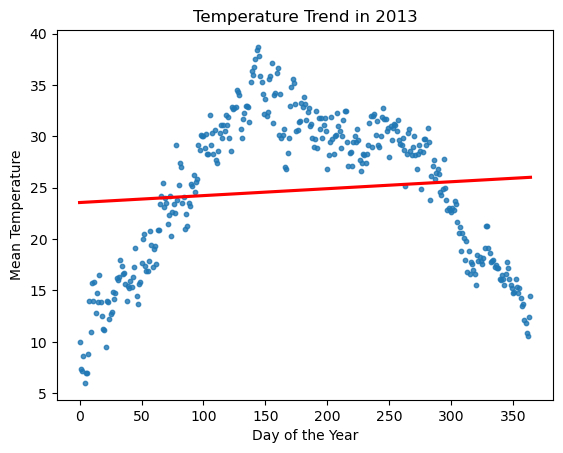

In [204]:
import seaborn as sns

# Convert index to numeric for regplot compatibility (days since start)
days_since_start = np.arange(len(data['2013']))
temp_2013 = data['meantemp']['2013']

sns.regplot(x=days_since_start, y=temp_2013, order=1, ci=None, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Temperature Trend in 2013')
plt.xlabel('Day of the Year')
plt.ylabel('Mean Temperature')
plt.show()


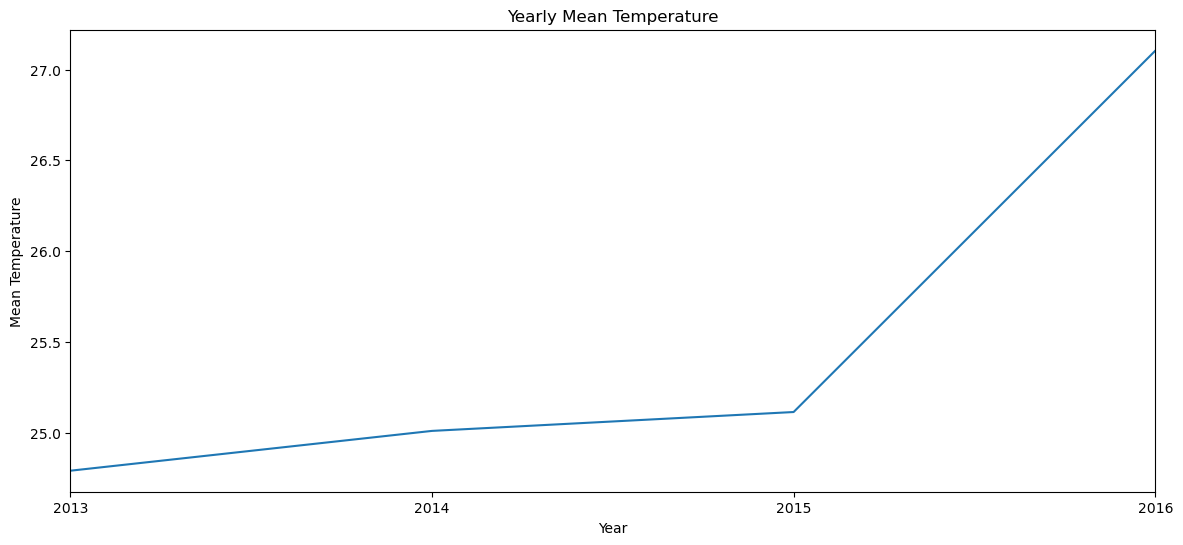

In [205]:
# Yearly mean temperature
yearly_mean.plot(title='Yearly Mean Temperature', figsize=(14, 6))
plt.xlabel('Year')
plt.ylabel('Mean Temperature')
plt.show()


In [206]:
# yearly average temps
yearly_avg_temps = data['meantemp'].resample('A').mean()
print(yearly_avg_temps)


date
2013-12-31    24.791494
2014-12-31    25.010673
2015-12-31    25.114591
2016-12-31    27.103373
Freq: A-DEC, Name: meantemp, dtype: float64


In [208]:
# Looking at the data for 2017 to examine the sharp drop
#data_2017 = data['2017']
#print(data_2017['meantemp'].describe())


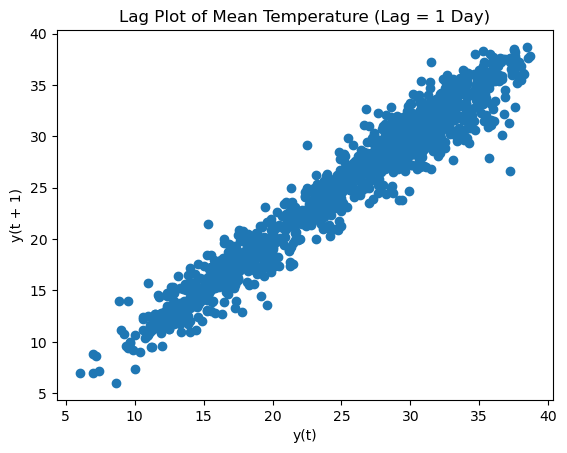

In [209]:
from pandas.plotting import lag_plot

# Plotting lag plot for 'meantemp' with a lag of 1 day
lag_plot(data['meantemp'], lag=1)
plt.title('Lag Plot of Mean Temperature (Lag = 1 Day)')
plt.show()


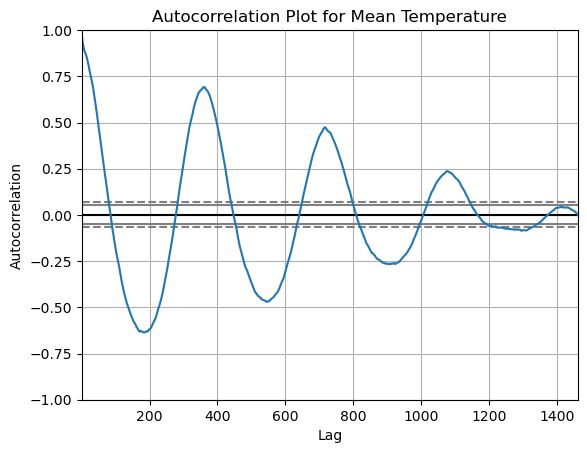

In [210]:
from pandas.plotting import autocorrelation_plot

# Autocorrelation plot for 'meantemp'
autocorrelation_plot(data['meantemp'])
plt.title('Autocorrelation Plot for Mean Temperature')
plt.show()


In [ ]:
# Part 4: Time Series Forecasting Using ARIMA Modeling

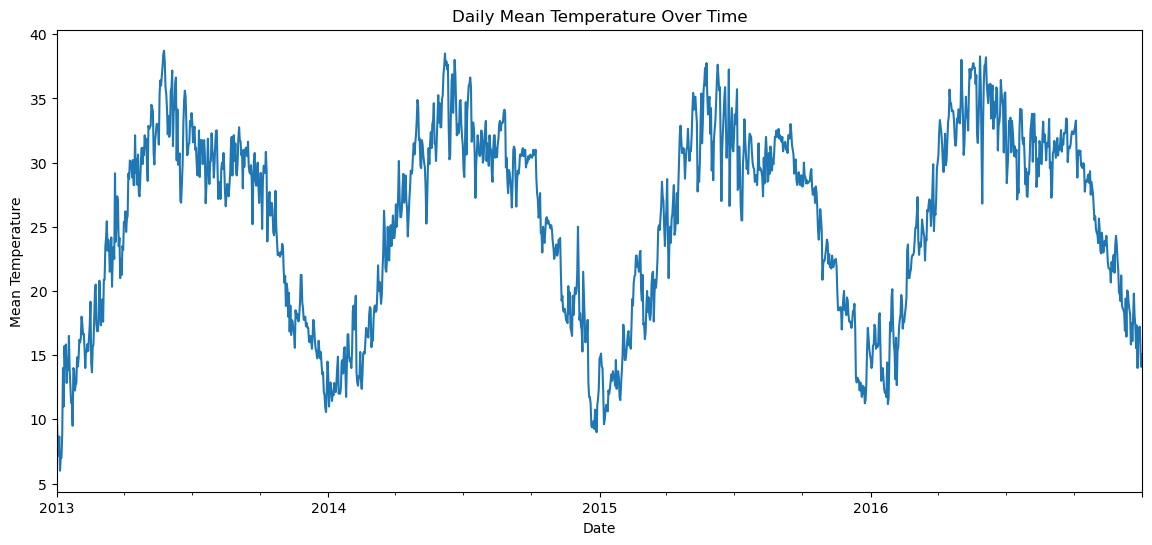

In [212]:
# Repeated plot
# Plot the time series of 'meantemp'
data['meantemp'].plot(figsize=(14, 6), title='Daily Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.show()


/Users/don/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


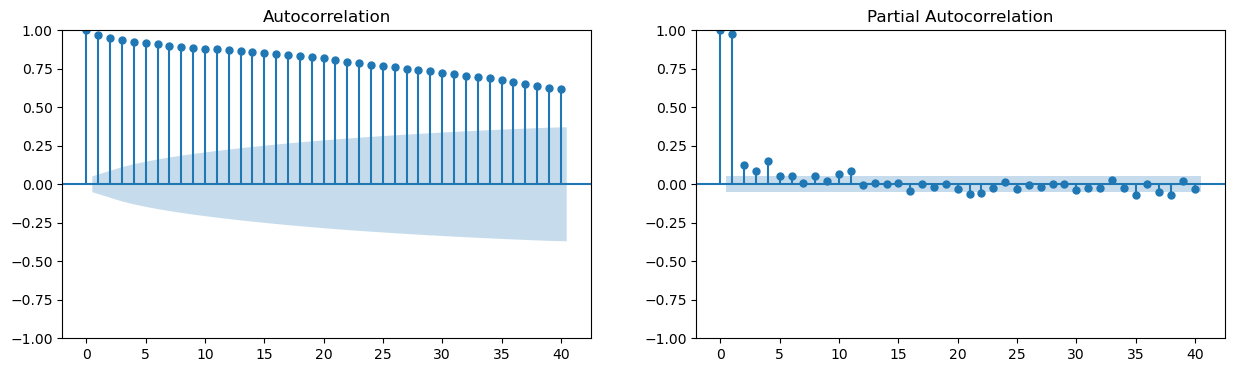

In [213]:
# Importing necessary libraries for ARIMA modeling
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# ACF and PACF plots:
fig, axes = plt.subplots(1, 2, figsize=(15,4))

# Plot the ACF on the first subplot
plot_acf(data['meantemp'], lags=40, ax=axes[0])

# Plot the PACF on the second subplot
plot_pacf(data['meantemp'], lags=40, ax=axes[1])

# Show plots
plt.show()

In [217]:
from statsmodels.tsa.arima.model import ARIMA
ts = data['meantemp']

# Fit ARIMA model
# Replace p, d, q with selected values
p = 1  
d = 1 
q = 1 

# If data is stationary, d may be 0
model = ARIMA(ts, order=(p, d, q))
results = model.fit()

# Print summary
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1461
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2761.417
Date:                Wed, 14 Feb 2024   AIC                           5528.834
Time:                        22:47:15   BIC                           5544.693
Sample:                    01-01-2013   HQIC                          5534.750
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5739      0.045     12.689      0.000       0.485       0.663
ma.L1         -0.8045      0.036    -22.457      0.000      -0.875      -0.734
sigma2         2.5721      0.071     36.053      0.0

/Users/don/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/don/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/don/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [222]:
# for predictions from the model for next 5 periods
forecast = results.get_forecast(steps=5)
print(forecast.summary_frame())

meantemp         mean   mean_se  mean_ci_lower  mean_ci_upper
2017-01-01  15.295082  1.603789      12.151713      18.438450
2017-01-02  15.434233  2.023599      11.468053      19.400414
2017-01-03  15.514097  2.266943      11.070972      19.957223
2017-01-04  15.559934  2.439062      10.779460      20.340409
2017-01-05  15.586242  2.576447      10.536499      20.635984


In [224]:
# Extract the forecasted mean temperatures
forecasted_means = forecast.summary_frame()['mean']

# Make the index of data2 in datetime format
data2['date'] = pd.to_datetime(data2['date'])
data2.set_index('date', inplace=True)

# Extract the actual mean temperatures from data2 for the forecasted dates
actual_means = data2.loc[forecasted_means.index]['meantemp']

# Calculate MAE and MAPE
mae = mean_absolute_error(actual_means, forecasted_means)
mape = np.mean(np.abs((actual_means - forecasted_means) / actual_means)) * 100

print(f"MAE: {mae}")
print(f"MAPE: {mape}%")


MAE: 2.2446910023337048
MAPE: 12.364210344277824%


In [225]:
model_new = ARIMA(ts, order=(2, 1, 2)) 
results_new = model_new.fit()

print(results_new.summary())

/Users/don/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/don/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/don/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1461
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2760.236
Date:                Thu, 15 Feb 2024   AIC                           5530.473
Time:                        01:18:41   BIC                           5556.904
Sample:                    01-01-2013   HQIC                          5540.332
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2678      0.183     -1.467      0.142      -0.626       0.090
ar.L2          0.5093      0.091      5.599      0.000       0.331       0.688
ma.L1          0.0274      0.185      0.148      0.8

In [228]:
forecast_new = results_new.get_forecast(steps=5)
print(forecast_new.summary_frame()['mean'])


2017-01-01    15.345087
2017-01-02    15.427259
2017-01-03    15.554206
2017-01-04    15.562062
2017-01-05    15.624614
Freq: D, Name: mean, dtype: float64


In [229]:
from sklearn.metrics import mean_absolute_error
import numpy as np

forecasted_means_new = forecast_new.summary_frame()['mean']
actual_means_new = data2.loc[forecasted_means_new.index, 'meantemp']

# Calculate MAE and MAPE for the new forecast
mae_new = mean_absolute_error(actual_means_new, forecasted_means_new)
mape_new = np.mean(np.abs((actual_means_new - forecasted_means_new) / actual_means_new)) * 100

print(f"New Model MAE: {mae_new}")
print(f"New Model MAPE: {mape_new}%")


New Model MAE: 2.2199628902525426
New Model MAPE: 12.218010825649642%


In [240]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import numpy as np

# Ensure data2's date column is the index
#data2.set_index('date', inplace=True)

# Initialize history with training data
history = data['meantemp'].tolist()

# Store actual values for comparison
actuals = data2['meantemp'].tolist()

# Lists to store predictions and actual values
predictions = []

# Walk-forward validation over the test set
for actual in actuals:
    # Fit model on history
    model = ARIMA(history, order=(1,1,1))  # Change order for ARIMA(2,1,2)
    model_fit = model.fit()
    
    # Forecast the next point
    forecast = model_fit.forecast(steps=1)
    predictions.append(forecast[0])
    
    # Append actual observation to history for the next iteration
    history.append(actual)

# Calculate error metrics
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((np.array(actuals) - np.array(predictions)) / np.array(actuals))) * 100

print(f'MAE: {mae}')
print(f'MAPE: {mape}%')


MAE: 1.3394292570316395
MAPE: 6.652311373370769%


In [239]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import numpy as np

# Initialize history with training data
history = data['meantemp'].tolist()

# Store actual values for comparison
actuals = data2['meantemp'].tolist()

# Lists to store predictions and actual values
predictions = []

# Walk-forward validation over the test set
for actual in actuals:
    # Fit model on history with the new ARIMA(2,1,2) configuration
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit()

    # Forecast the next point
    forecast = model_fit.forecast(steps=1)
    predictions.append(forecast[0])

    # Append actual observation to history for the next iteration
    history.append(actual)

# Calculate error metrics for the ARIMA(2,1,2) model
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((np.array(actuals) - np.array(predictions)) / np.array(actuals))) * 100

print(f'ARIMA(2,1,2) MAE: {mae}')
print(f'ARIMA(2,1,2) MAPE: {mape}%')


ARIMA(2,1,2) MAE: 1.3430990668722131
ARIMA(2,1,2) MAPE: 6.665127368326964%
